# Week 1 Tutorial:<br>Web Scraping Solutions

POP77142 Quantitative Text Analysis for Social Scientists

## Webpage Elements & Source Code

-   Modern browsers come with very powerful built-in tools that help in
    web scraping
-   Two most useful for us are:
    -   Element inspection (Move cursor to some element on the page,
        Right click, Pick ‘Inspect’ from a menu)
    -   Viewing page source (`Ctrl + U`/`Option + CMD + U` in
        Windows(Linux)/Mac for Chrome and Firefox)
-   Knowing the source code and element attributes helps build XPaths
    for selection

## Element Inspection (Firefox)

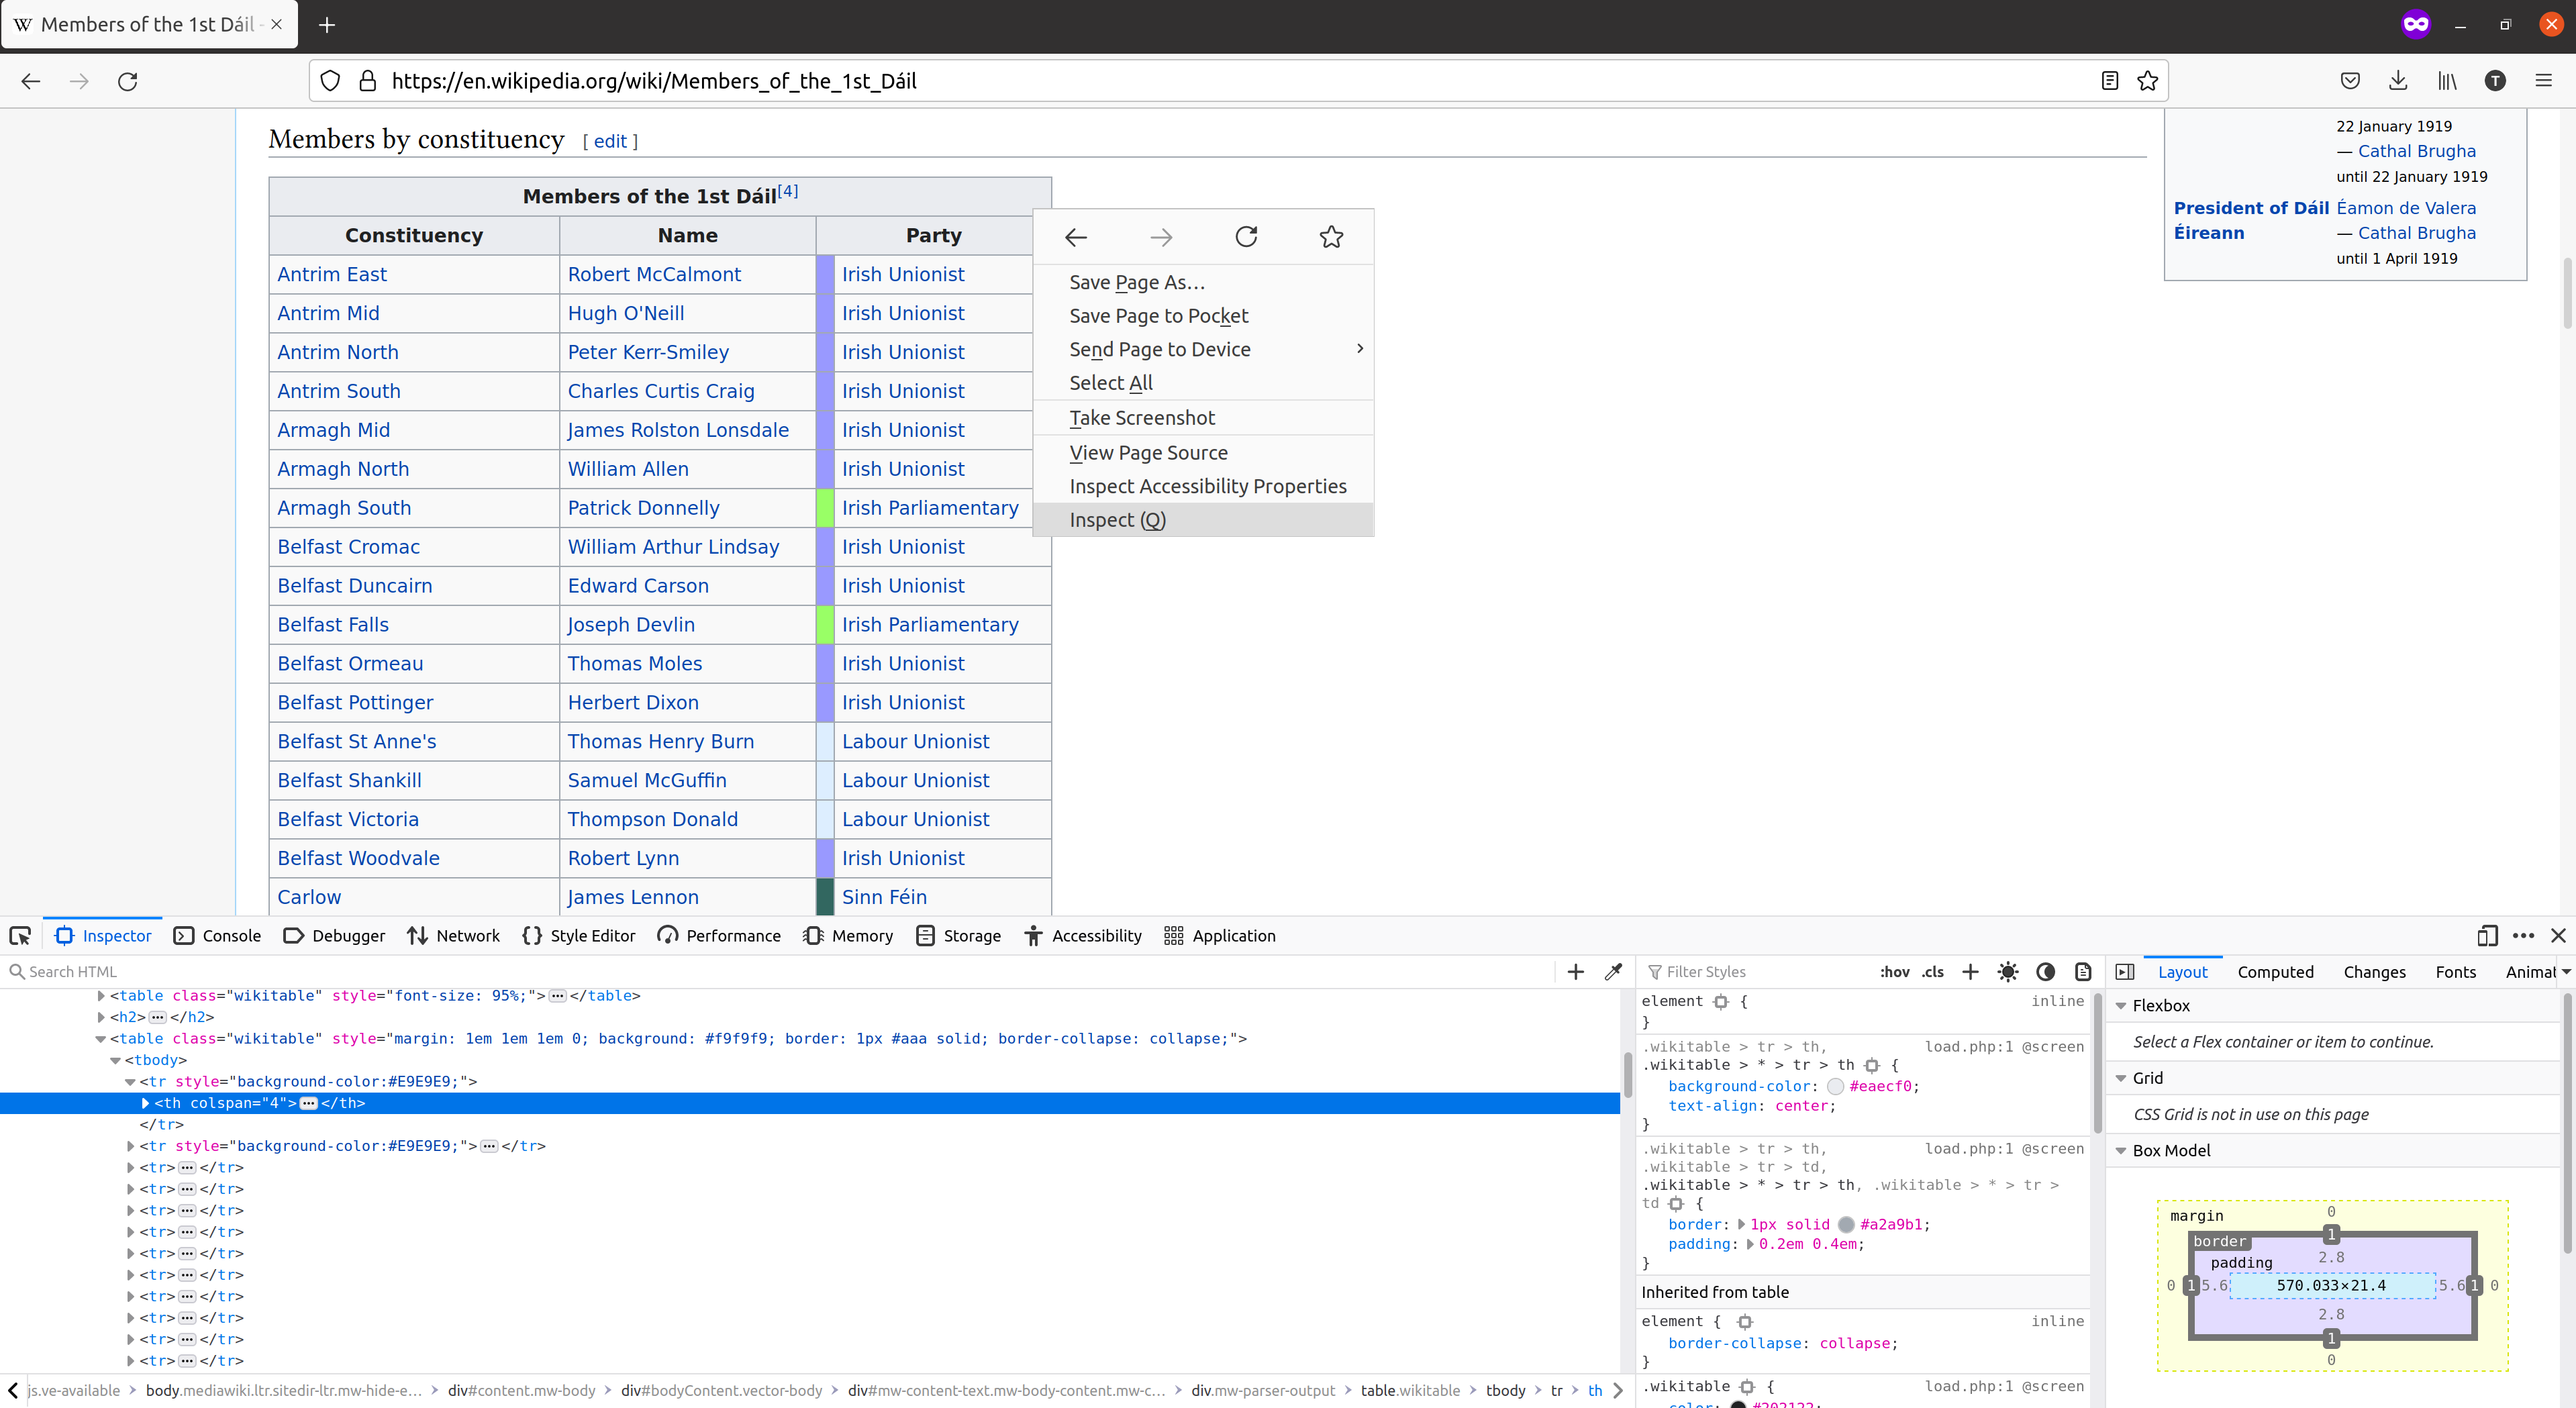

## Element Inspection (Chrome)

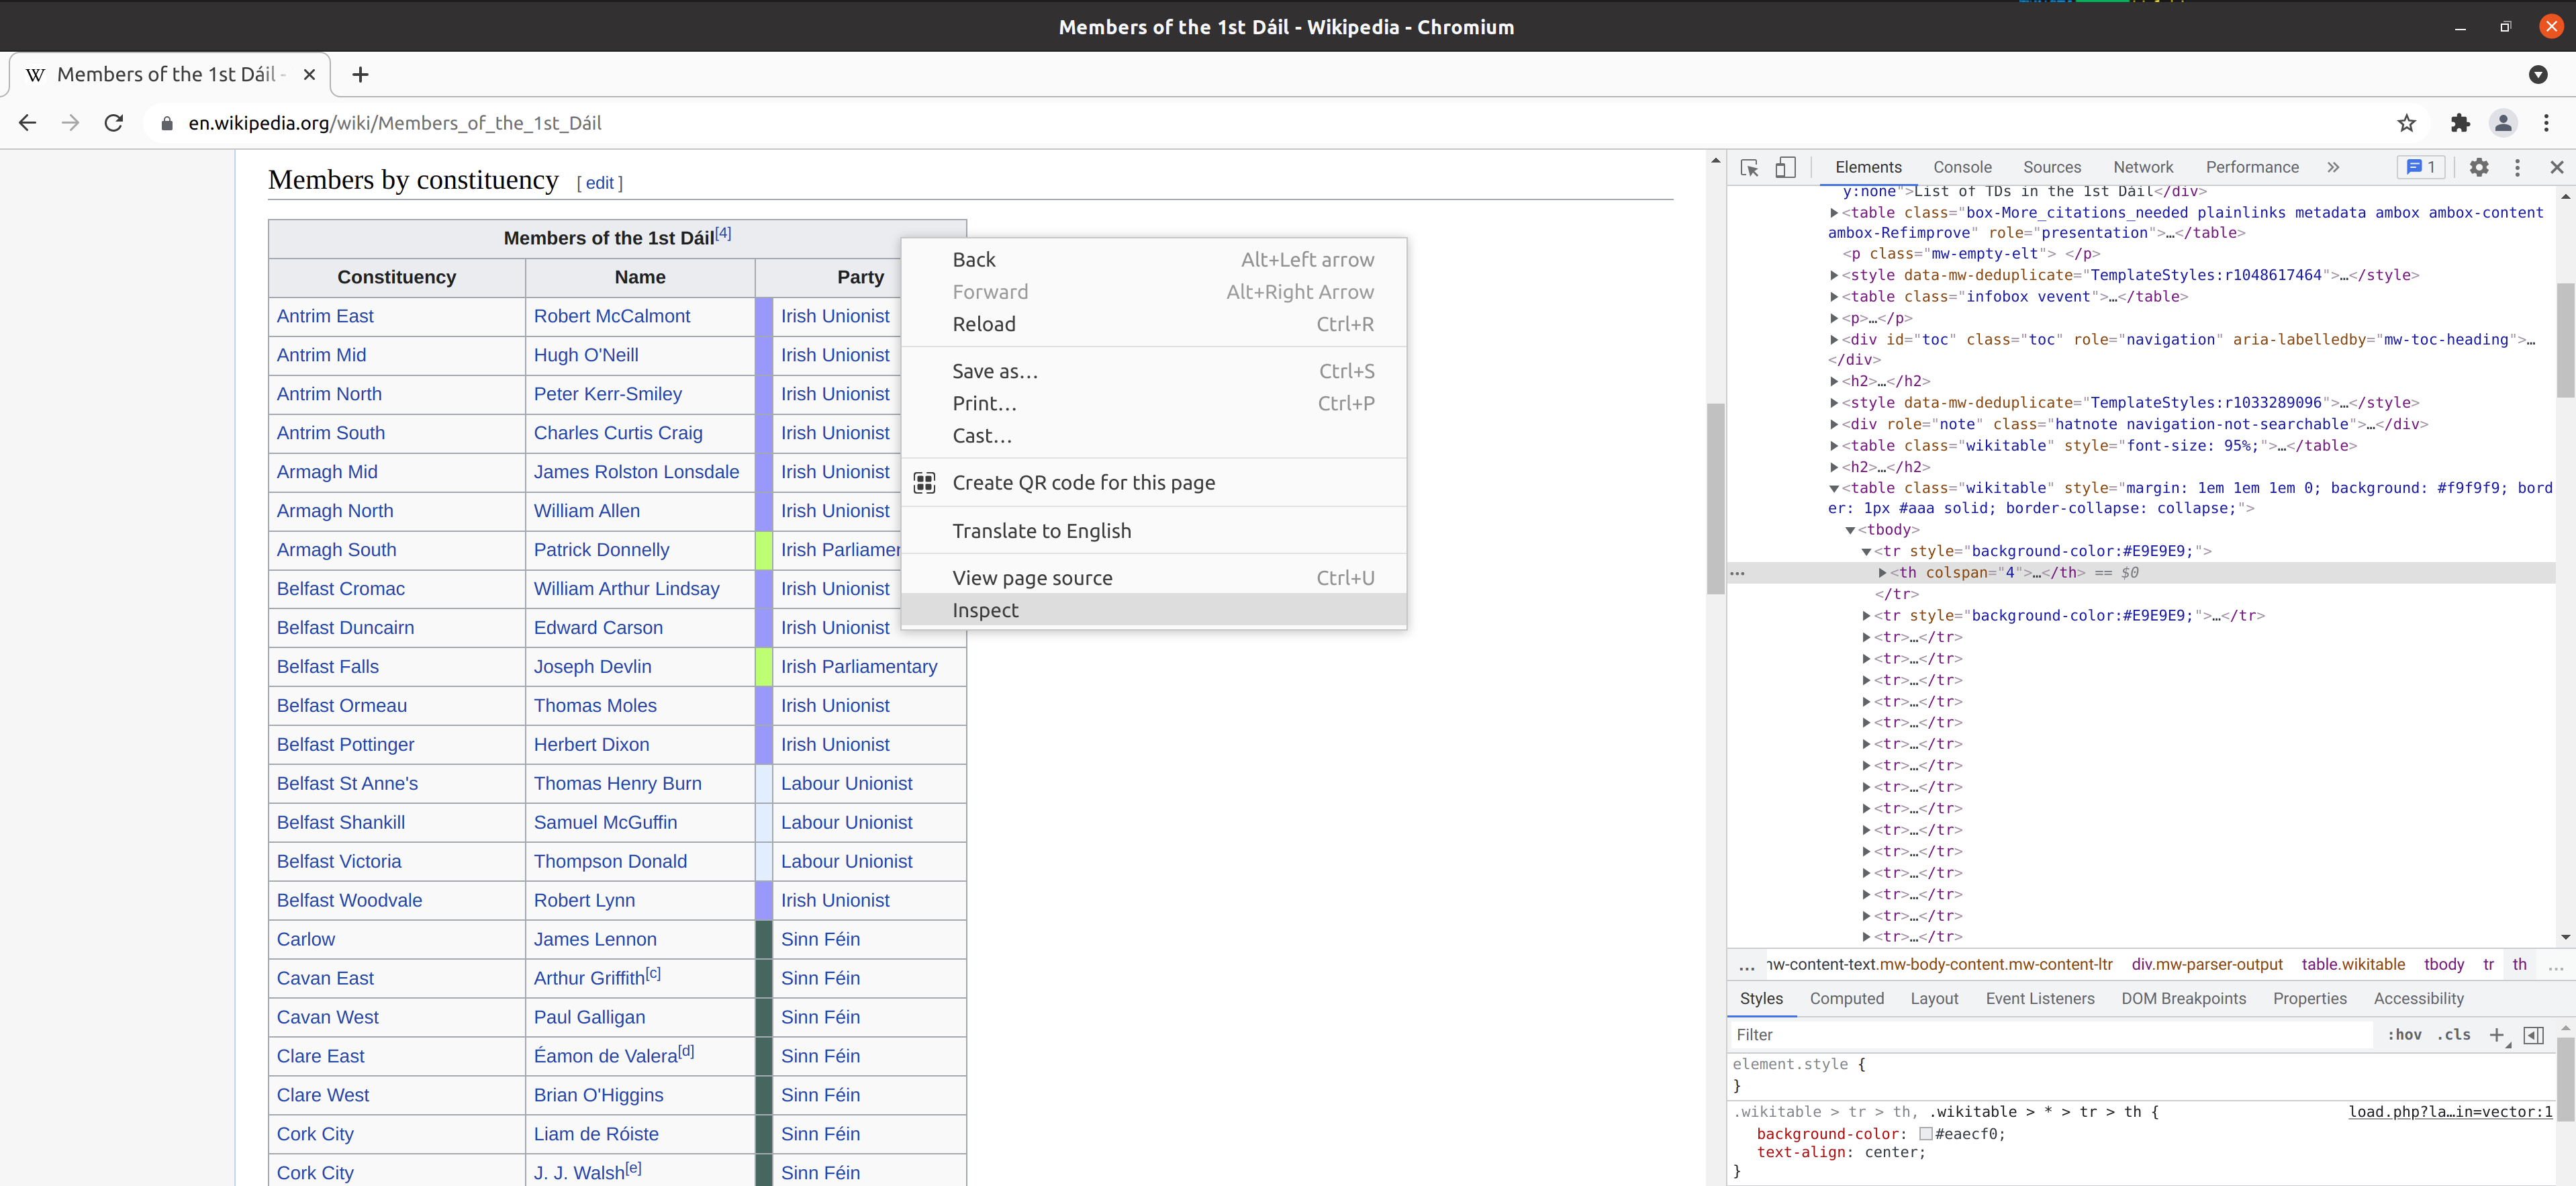

## Source Code Inspection

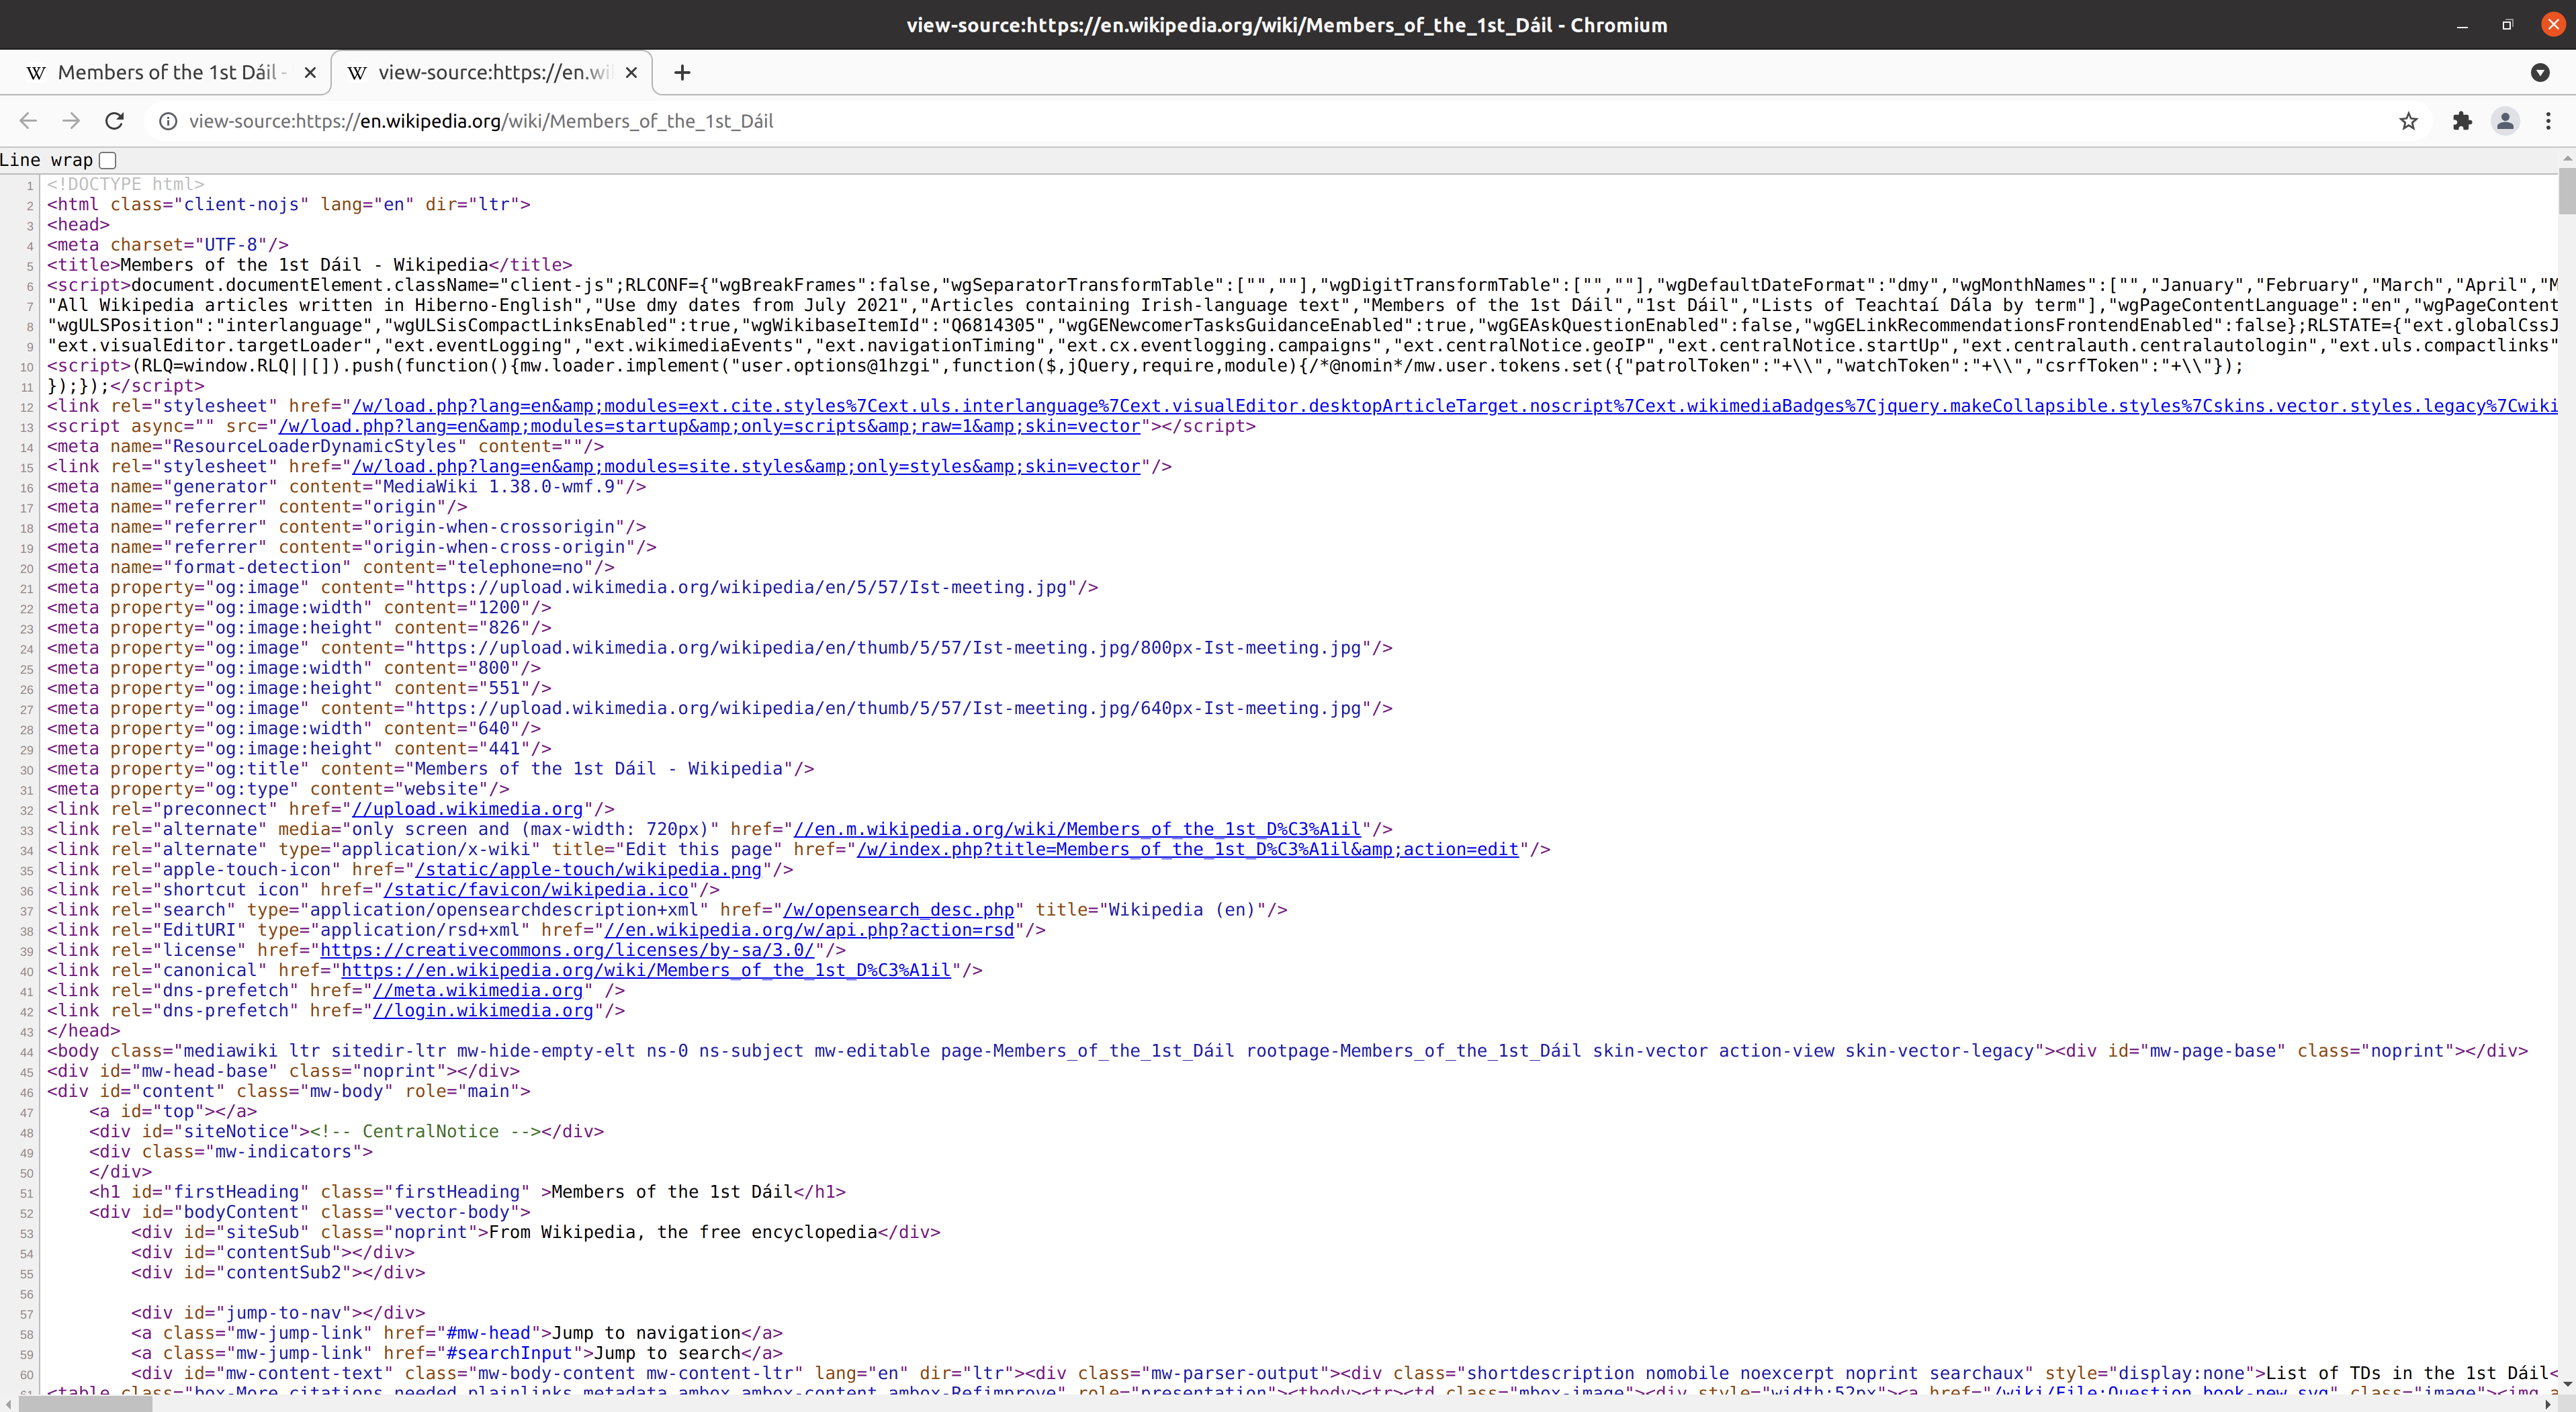

## Exercise 1: Working with HTML

-   Consider a simple HTML code below.
-   Read it into R using `rvest`’s `read_html()` function.
-   How many children does the `<body>` element have?
-   Build an XPath to extract the first paragraph.
-   Build an XPath to extract the second sub-heading under a green
    header.

##

In [ ]:
library("rvest")


Attaching package: 'rvest'

The following object is masked from 'package:readr':

    guess_encoding

. . .

In [ ]:
html_txt <- "
<!DOCTYPE html> 
<html>
    <head>
        <title>A title</title> 
    </head>
    <body>
        <h1 style='color:Red;'>
        Heading 1
        <h2>Subheading</h2>
        </h1>
        <h1 style='color:Green;'>
        Heading 2
        <h2>Subheading 1</h2>
        <h2>Subheading 2</h2>
        </h1> 
        <p>A paragraph.</p>
        <p>Another paragraph.</p>
    </body>
</html>"

##

In [ ]:
html <- rvest::read_html(html_txt)

. . .

In [ ]:
# First, let's extract the element `<body>` from the HTML tree
body1 <- rvest::html_children(html)[2]
body1

{xml_nodeset (1)}
[1] <body>\n        <h1 style="color:Red;">\n        Heading 1\n        <h2>S ...

. . .

In [ ]:
# Alternatively, we can use an XPath to achieve it
body2 <- rvest::html_elements(html, xpath = "//body")
body2

{xml_nodeset (1)}
[1] <body>\n        <h1 style="color:Red;">\n        Heading 1\n        <h2>S ...

. . .

In [ ]:
# Element `<body>` has 4 children
length(rvest::html_children(body1))

[1] 4

. . .

In [ ]:
pars <- rvest::html_elements(html, xpath = "//p")
pars

{xml_nodeset (2)}
[1] <p>A paragraph.</p>
[2] <p>Another paragraph.</p>

. . .

In [ ]:
pars[1]

{xml_nodeset (1)}
[1] <p>A paragraph.</p>

. . .

In [ ]:
# Alternatively, we can build an XPath that checks the text of the paragraph
# Although, this approach is less reliable in practice as texts on websites
# change more frequently than the layout or design
par_1 <- rvest::html_elements(html, xpath = "//p[text()='A paragraph.']")
par_1

{xml_nodeset (1)}
[1] <p>A paragraph.</p>

##

In [ ]:
# One way to extract the second sub-heading under a green header
# would be to extract all `<h2>` elements and pick the one that
# contains.
subheads <- rvest::html_elements(html, xpath = "//h2")
subheads

{xml_nodeset (3)}
[1] <h2>Subheading</h2>
[2] <h2>Subheading 1</h2>
[3] <h2>Subheading 2</h2>

. . .

In [ ]:
subheads[3]

{xml_nodeset (1)}
[1] <h2>Subheading 2</h2>

. . .

In [ ]:
# However, we would prefer to be as precise as possible,
# while keeping in mind potential website changes.
# It is more likely that website would have another `<h2>` element
# somewhere on the page, breaking our indexing, rather than
# another sub-header added under the green heading.
subheads_green <- rvest::html_elements(html, xpath = "//h1[@style='color:Green;']/h2")
subheads_green

{xml_nodeset (2)}
[1] <h2>Subheading 1</h2>
[2] <h2>Subheading 2</h2>

. . .

In [ ]:
subheads_green[2]

{xml_nodeset (1)}
[1] <h2>Subheading 2</h2>

## Exercise 2: Working with Webpages

-   Now let’s turn to a real website.
-   Here we will extract the table of countries with their GDP from a
    [Wikipedia
    article](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28PPP%29_per_capita)
-   Start by loading in the webpage using `rvest`’s `read_html()`
    function.
-   Go the webpage of the article and locate the elements that would be
    helpful for table extraction.
-   Extract the `<table>` node that corresponds to the main table.
-   Extract `<tbody>` element as a child of this element
-   Extract the table of with data using `rvest`’s `html_table()`
    function
-   Tidy up the extracted table

##

In [ ]:
url <- "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28PPP%29_per_capita"
html <- rvest::read_html(url)

. . .

In [ ]:
str(html)

List of 2
 $ node:<externalptr> 
 $ doc :<externalptr> 
 - attr(*, "class")= chr [1:2] "xml_document" "xml_node"

. . .

In [ ]:
tables <- rvest::html_elements(html, xpath = "//table")
tables

{xml_nodeset (10)}
 [1] <table class="box-Update plainlinks metadata ambox ambox-content ambox-U ...
 [2] <table width="100%h"><tbody><tr>\n<td valign="top"> <style data-mw-dedup ...
 [3] <table class="wikitable sortable sticky-header-multi sort-under static-r ...
 [4] <table style="font-size:100%;"><tbody>\n<tr>\n<td width="50%" align="cen ...
 [5] <table class="wikitable sortable" style="margin-left:auto;margin-right:a ...
 [6] <table class="wikitable sortable" style="margin-left:auto;margin-right:a ...
 [7] <table class="nowraplinks mw-collapsible uncollapsed navbox-inner" style ...
 [8] <table class="nowraplinks hlist mw-collapsible autocollapse navbox-inner ...
 [9] <table class="nowraplinks navbox-subgroup" style="border-spacing:0"><tbo ...
[10] <table class="nowraplinks mw-collapsible autocollapse navbox-inner" styl ...

##

In [ ]:
# From the page's source code we can infer that the third table
# is the one that contains list of countries with corresponding GDP
tables[3]

{xml_nodeset (1)}
[1] <table class="wikitable sortable sticky-header-multi sort-under static-ro ...

. . .

In [ ]:
# We don't have to supply the original html as html_elements() function input
# Also, we can use a useful relative XPath that starts with './'
# This allows extracting descendants (children) of the current node
tbody <- rvest::html_elements(tables[3], xpath = ".//tbody")
tbody

{xml_nodeset (1)}
[1] <tbody>\n<tr class="static-row-header" style="text-align:center;vertical- ...

. . .

In [ ]:
tb <- rvest::html_table(tbody)
tb

[[1]]
# A tibble: 231 × 7
   `Country/Territory` `IMF[4][5]` `IMF[4][5]` `World Bank[6]` `World Bank[6]`
   <chr>               <chr>       <chr>       <chr>           <chr>          
 1 Country/Territory   Projection  Year        Estimate        Year           
 2 Luxembourg *        154,915     2025        143,342         2023           
 3 Singapore *         153,609     2025        141,500         2023           
 4 Liechtenstein *     —           —           —               —              
 5 Macau *             140,246     2025        113,183         2023           
 6 Ireland *           131,548     2025        127,623         2023           
 7 Monaco *            —           —           —               —              
 8 Qatar *             118,762     2025        121,125         2022           
 9 Bermuda *           —           —           106,866         2022           
10 Norway *            106,540     2025        104,460         2023           
# ℹ 221 more rows
# ℹ 2 mo

##

In [ ]:
str(tb)

List of 1
 $ : tibble [231 × 7] (S3: tbl_df/tbl/data.frame)
  ..$ Country/Territory: chr [1:231] "Country/Territory" "Luxembourg *" "Singapore *" "Liechtenstein *" ...
  ..$ IMF[4][5]        : chr [1:231] "Projection" "154,915" "153,609" "—" ...
  ..$ IMF[4][5]        : chr [1:231] "Year" "2025" "2025" "—" ...
  ..$ World Bank[6]    : chr [1:231] "Estimate" "143,342" "141,500" "—" ...
  ..$ World Bank[6]    : chr [1:231] "Year" "2023" "2023" "—" ...
  ..$ CIA[7][8][9]     : chr [1:231] "Estimate" "115,700" "106,000" "139,100" ...
  ..$ CIA[7][8][9]     : chr [1:231] "Year" "2021" "2021" "2009" ...

. . .

In [ ]:
# First, let's unlist the extracted table
tb <- tb[[1]]
str(tb)

tibble [231 × 7] (S3: tbl_df/tbl/data.frame)
 $ Country/Territory: chr [1:231] "Country/Territory" "Luxembourg *" "Singapore *" "Liechtenstein *" ...
 $ IMF[4][5]        : chr [1:231] "Projection" "154,915" "153,609" "—" ...
 $ IMF[4][5]        : chr [1:231] "Year" "2025" "2025" "—" ...
 $ World Bank[6]    : chr [1:231] "Estimate" "143,342" "141,500" "—" ...
 $ World Bank[6]    : chr [1:231] "Year" "2023" "2023" "—" ...
 $ CIA[7][8][9]     : chr [1:231] "Estimate" "115,700" "106,000" "139,100" ...
 $ CIA[7][8][9]     : chr [1:231] "Year" "2021" "2021" "2009" ...

. . .

In [ ]:
# Next, let's fix the mix-up of column names and the first row
c_names <- unlist(tb[1,])
c_names[3:9] <- paste(
  c_names[3:9],
  rep(c("IMF", "World_Bank", "CIA"), each = 2),
  sep = "_"
)

. . .

In [ ]:
colnames(tb) <- c_names
tb <- tb[-1,]

##

In [ ]:
str(tb)

tibble [230 × 7] (S3: tbl_df/tbl/data.frame)
 $ Country/Territory  : chr [1:230] "Luxembourg *" "Singapore *" "Liechtenstein *" "Macau *" ...
 $ Projection         : chr [1:230] "154,915" "153,609" "—" "140,246" ...
 $ Year_IMF           : chr [1:230] "2025" "2025" "—" "2025" ...
 $ Estimate_IMF       : chr [1:230] "143,342" "141,500" "—" "113,183" ...
 $ Year_World_Bank    : chr [1:230] "2023" "2023" "—" "2023" ...
 $ Estimate_World_Bank: chr [1:230] "115,700" "106,000" "139,100" "64,800" ...
 $ Year_CIA           : chr [1:230] "2021" "2021" "2009" "2021" ...

. . .

In [ ]:
# Note that the original table contained some region-level aggregate statistics
tb[tb$`Country/Territory` == "World",]

# A tibble: 1 × 7
  `Country/Territory` Projection Year_IMF Estimate_IMF Year_World_Bank
  <chr>               <chr>      <chr>    <chr>        <chr>          
1 World               25,591     [i]2025  20,946       2022           
# ℹ 2 more variables: Estimate_World_Bank <chr>, Year_CIA <chr>

. . .

In [ ]:
tb <- tb[!(tb$`Country/Territory` %in% c("World")),]

##

In [ ]:
str(tb)

tibble [229 × 7] (S3: tbl_df/tbl/data.frame)
 $ Country/Territory  : chr [1:229] "Luxembourg *" "Singapore *" "Liechtenstein *" "Macau *" ...
 $ Projection         : chr [1:229] "154,915" "153,609" "—" "140,246" ...
 $ Year_IMF           : chr [1:229] "2025" "2025" "—" "2025" ...
 $ Estimate_IMF       : chr [1:229] "143,342" "141,500" "—" "113,183" ...
 $ Year_World_Bank    : chr [1:229] "2023" "2023" "—" "2023" ...
 $ Estimate_World_Bank: chr [1:229] "115,700" "106,000" "139,100" "64,800" ...
 $ Year_CIA           : chr [1:229] "2021" "2021" "2009" "2021" ...

. . .

In [ ]:
# Before attempting to convert we need to remove commas
# from formatted numbers in the columns.
tb[,2:7] <- lapply(tb[,2:7], function(x) gsub(",", "", x))
tb[,2:7] <- lapply(tb[,2:7], function(x) ifelse(x == "N/A", NA, x))
tb[,2:7] <- lapply(tb[,2:7], as.numeric)

Warning in lapply(tb[, 2:7], as.numeric): NAs introduced by coercion
Warning in lapply(tb[, 2:7], as.numeric): NAs introduced by coercion
Warning in lapply(tb[, 2:7], as.numeric): NAs introduced by coercion
Warning in lapply(tb[, 2:7], as.numeric): NAs introduced by coercion
Warning in lapply(tb[, 2:7], as.numeric): NAs introduced by coercion

. . .

In [ ]:
str(tb)

tibble [229 × 7] (S3: tbl_df/tbl/data.frame)
 $ Country/Territory  : chr [1:229] "Luxembourg *" "Singapore *" "Liechtenstein *" "Macau *" ...
 $ Projection         : num [1:229] 154915 153609 NA 140246 131548 ...
 $ Year_IMF           : num [1:229] 2025 2025 NA 2025 2025 ...
 $ Estimate_IMF       : num [1:229] 143342 141500 NA 113183 127623 ...
 $ Year_World_Bank    : num [1:229] 2023 2023 NA 2023 2023 ...
 $ Estimate_World_Bank: num [1:229] 115700 106000 139100 64800 102500 ...
 $ Year_CIA           : num [1:229] 2021 2021 2009 2021 2021 ...